### 라이브러리 불러오기

In [1]:
#필요한 라이브러리 설치
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install numpy

In [2]:
#경고 메시지 없애기
import warnings
warnings.filterwarnings(action='ignore')

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.font_manager as fm
plt.rc('font', family='Malgun Gothic') 

# plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams["figure.figsize"] = (25, 10)

In [4]:
#원본 데이터셋 불러오기
df1 = pd.read_csv('2조Data.csv', encoding='CP949', thousands=',')
df1.head()

,호선,역이름,무임승하차비율,무임승하차,유임승하차,출퇴근시간 이용객수,출퇴근시간 제외한 이용객수,역간거리(km),지역,행정동,...,자동차수,통근 통학시 지하철 이용 비율,250m내 버스정류장 수,자치구별 지하철역 개수,자동차세,재산세,지방소득세(2020),지역별 기초수급자 비율,차 1대당 석유사용량,"2020 세금평균(자동차, 재산,지방소득)"
0,1호선,동대문,29.746110,256357.7205,6.054616e+05,201212.7912,6.684911e+05,0.6,종로구,창신동,...,50533.0,30.4,5.0,15.0,9781,101544,464908,0.002775,0.2675,192078.0
1,1호선,동묘앞,46.742445,285406.8925,3.251878e+05,139446.4615,4.594895e+05,0.7,종로구,숭인동,...,50533.0,30.4,8.0,15.0,9781,101544,464908,0.003191,0.2675,192078.0
2,1호선,서울역,13.291690,392607.1828,2.561172e+06,965310.6264,2.019218e+06,1.1,중구,회현동,...,58919.0,41.1,10.0,24.0,10353,150957,853522,0.003666,1.2096,338277.0
3,1호선,시청,13.331403,183237.7312,1.191244e+06,522431.5495,8.439801e+05,1.0,중구,소곡동,...,58919.0,41.1,7.0,24.0,10353,150957,853522,0.000388,1.2096,338277.0
4,1호선,신설동,25.844703,225766.4408,6.477837e+05,301949.8242,5.763451e+05,0.9,동대문구,용신동,...,98441.0,32.1,11.0,14.0,18247,68342,59508,0.004825,0.5779,48699.0


### 지역별 노인인구수, 무임승하차수비율, 세금평균 시각화

- 가나다 순으로 지역 정렬

<AxesSubplot:xlabel='지역', ylabel='노인인구수'>

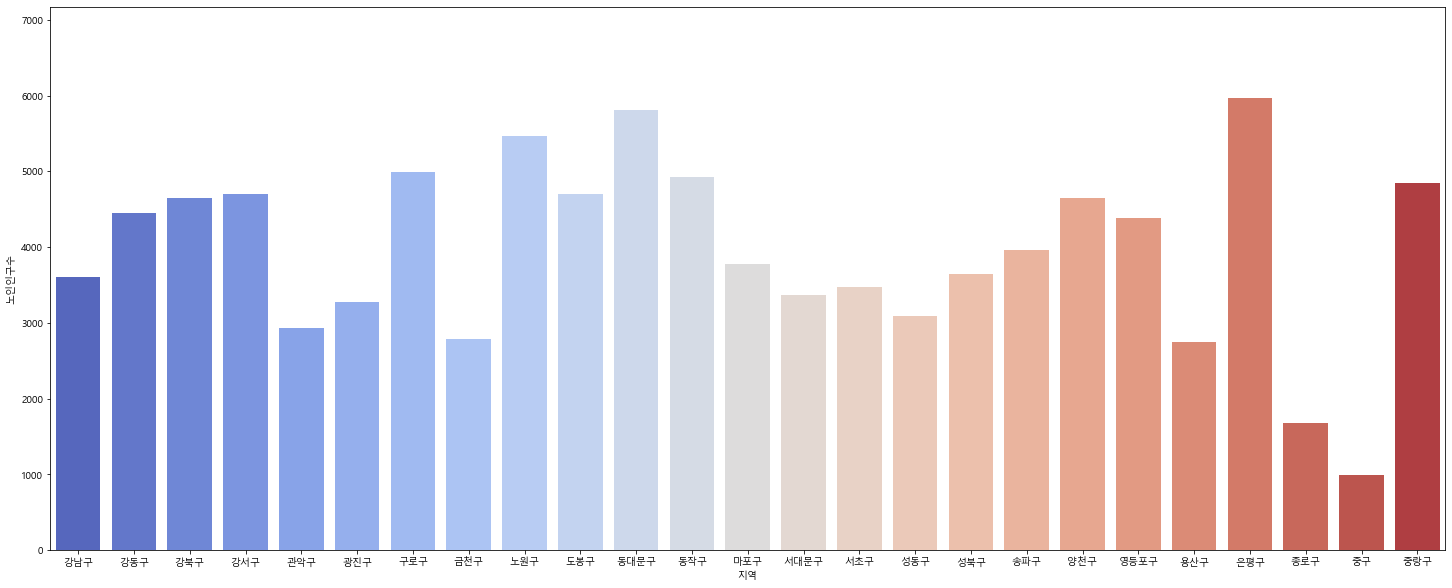

In [5]:
#지역별 노인인구수

df_sort = df1.sort_values('지역')   # 가나다 순으로 정렬

sns.barplot(x='지역', y='노인인구수', data=df_sort, palette='coolwarm', errwidth=0)

<AxesSubplot:xlabel='지역', ylabel='무임승하차비율'>

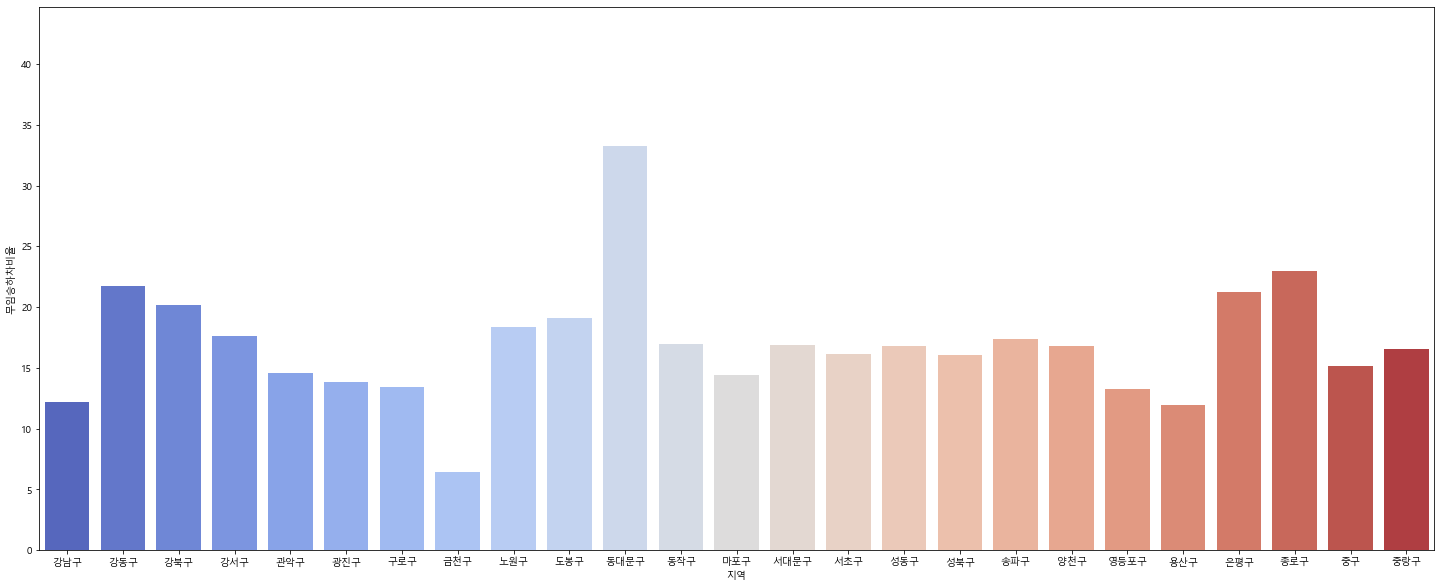

In [6]:
# 지역별 무임승하차비율
df_sort = df1.sort_values('지역') # 가나다 순으로 정렬

sns.barplot(x='지역',y='무임승하차비율', data = df_sort ,palette='coolwarm', errwidth=0)

<AxesSubplot:xlabel='지역', ylabel='2020 세금평균(자동차, 재산,지방소득)'>

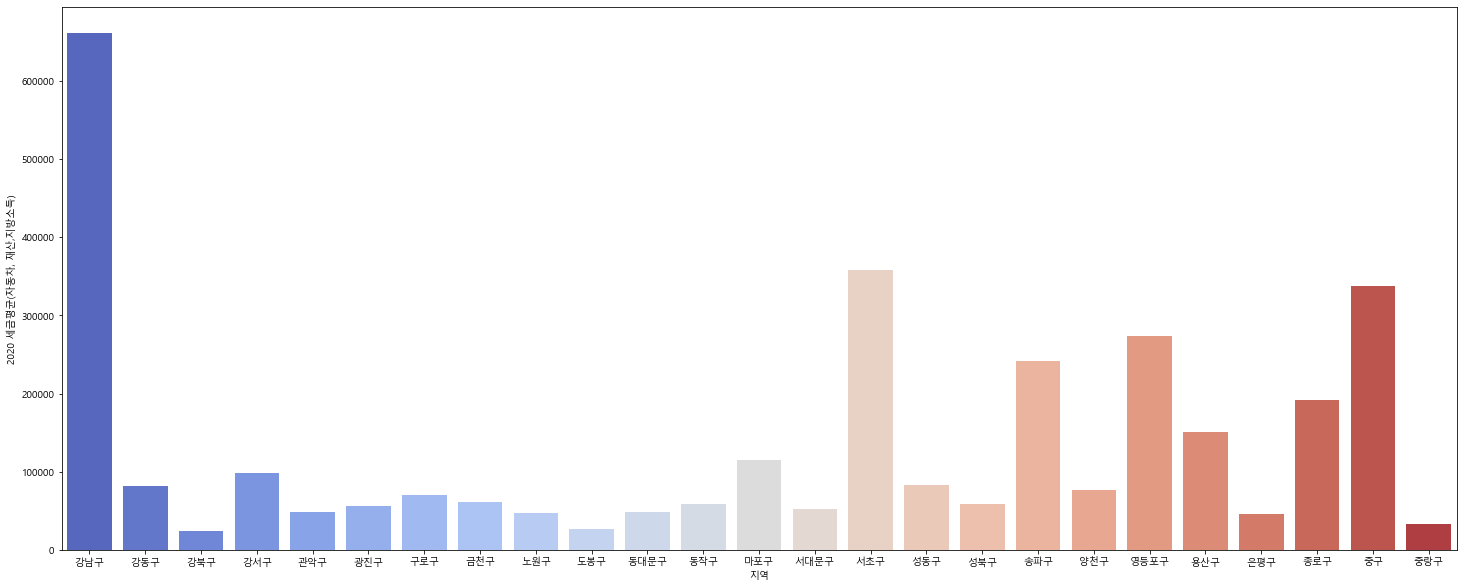

In [7]:
# 지역별 세금평균
df_sort = df1.sort_values('지역') # 가나다 순으로 정렬

sns.barplot(x='지역',y='2020 세금평균(자동차, 재산,지방소득)', data = df_sort ,palette='coolwarm', errwidth=0)

### 2021년 지하철 승하차 수 요일별, 시간별로 분류하여 시각화

평일과 주말로 나눈 후 시간별로 유무임승하차가 많이 이루어진 시간대 파악

In [8]:
sns.set_theme(style='whitegrid', font_scale=1.5)
sns.set_palette('Set2', n_colors=10)
plt.rcParams["axes.unicode_minus"] = False
plt.rcParams['font.family'] = 'malgun gothic'

In [9]:
#데이터 불러오기
df2 = pd.read_csv('2021_유무임승하차_요일_시간별.csv', encoding='cp949')

In [10]:
#날짜 데이터로 변환
df2['날짜'] = pd.to_datetime(df2['날짜'], format='%Y-%m-%d')

In [11]:
#월화수목금토일을 0~6으로 리턴
df2['week'] = df2['날짜'].dt.dayofweek

In [12]:
#연번, 합 계 컬럼 삭제
df2.drop(columns=['연번', '합 계'], inplace=True)

In [13]:
#평일(월화수목금)을 0으로 변환
df2['week'] = df2['week'].astype('str').str.replace('1', '0')
df2['week'] = df2['week'].astype('str').str.replace('2', '0')
df2['week'] = df2['week'].astype('str').str.replace('3', '0')
df2['week'] = df2['week'].astype('str').str.replace('4', '0')

df2['week'] = df2['week'].astype('int')

In [14]:
#평일, 토요일, 일요일로 그룹
week = df2.groupby('week').mean().drop(columns=['호선', '역번호'])
week.index = ['평일', '토요일', '일요일']

<AxesSubplot:>

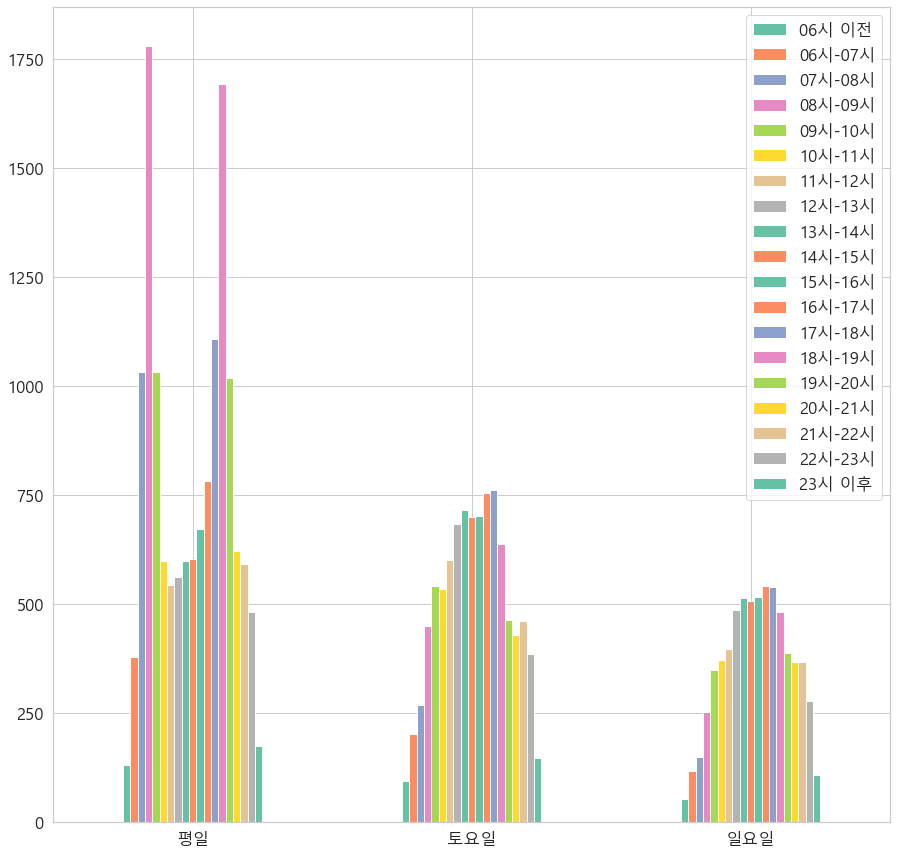

In [15]:
#막대그래프로 시각화
week.plot(kind='bar', figsize=(15,15), rot=360)